## Covid - 19 Data Analysis

### *Loading Libraries and Data*

In [1]:
# loading libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb

%matplotlib inline

####  Loading data saved after processing.

In [2]:
# Loading data

df = pd.read_csv('cleaned_data.csv')

df.sample(5)

,created_at,favorite_count,lang,place,retweet_count,user_screen_name,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_statuses_count
33126,2020-06-05 08:04:55,157,en,chandigarh,39,nagarkoti,4831,9606,603,18,10324
12644,2020-01-04 07:30:40,1,en,patna,0,FattyMotu,34724,2190,2172,5,38648
3672,2020-03-26 19:14:55,16,en,bengaluru,20,PrabhasAnanda,44229,2018,913,3,26321
21816,2020-04-19 10:23:43,1,en,fort tondiarpet,0,joyousnaveen,59,210,137,0,1195
12673,2020-01-04 07:39:53,1,en,lucknow,0,sunils1,953,1621,1504,8,7553


#### Since, while importing datetime format is imported as string, so converting to datetime

In [3]:
# Changing object to datetime
df.created_at = pd.to_datetime(df.created_at)

# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33991 entries, 0 to 33990
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   created_at             33991 non-null  datetime64[ns]
 1   favorite_count         33991 non-null  int64         
 2   lang                   33991 non-null  object        
 3   place                  33990 non-null  object        
 4   retweet_count          33991 non-null  int64         
 5   user_screen_name       33991 non-null  object        
 6   user_favourites_count  33991 non-null  int64         
 7   user_followers_count   33991 non-null  int64         
 8   user_friends_count     33991 non-null  int64         
 9   user_listed_count      33991 non-null  int64         
 10  user_statuses_count    33991 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(3)
memory usage: 2.9+ MB


In [4]:
# Sample data
df.sample(5)

,created_at,favorite_count,lang,place,retweet_count,user_screen_name,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_statuses_count
25090,2020-01-05 14:34:08,5,en,hubli,1,ganapatisk9,3411,84,112,0,426
3879,2020-03-27 02:58:22,0,en,patna,0,rajeshpmch89,38,15,49,0,32
28776,2020-03-05 14:28:03,0,en,mumbai,0,vinkshah61,1536,154,746,2,11985
13470,2020-01-04 16:22:46,0,en,raipur,0,rameshagarwal2,317,37,126,0,533
21855,2020-04-19 10:55:37,2,en,marmagao,0,KuldeepArolkar9,1254,79,572,1,1991


#### Loading Tweets

In [5]:
# Loading tweets

tweets = []

with open('cleaned_tweets.txt', 'r') as reader:
    lines = reader.readlines()
    for line in lines:
        line = line.replace('\n', '') # Removing escape character
        tweets.append(line)

In [6]:
# Sample tweets
tweets[:10]

['meditation mindfulness tip cop corona virus pandemicas people become anxious selfquarantine homeexperts recommend mindfulness meditation practice prove',
 'contribute india fight corona gandhinagar gujarat',
 '@delhipolice sir please send team immediately sanitize build',
 'sscufmmatkarona corona slow poison ufm instant killer thousands genuine aspirants @pmoindia',
 'mata di doston ise corona ke tarah faila bhai please like share comment subscribe channel youtube pritamkumarmurari support voice',
 '@chintskap mum phd corona virus whatsapp university',
 '@funnyhammy dumbo amount count today emergency period countries announce billions dollars corona combat feku fool people like',
 'first allow corona possessions stop kirana shop clearly nany bhakts listen modi anymore certainly yogi',
 '@tvmarathi kindly help us break chain corona',
 'safe home corona busy infect people spread like wild fire home assure familyfriends amp everyone feel important safe amp sound remember corona bahar bu

#### Loading Hashtags

In [7]:
# Hashtags
hashtags = pd.read_csv('hashtags.csv', names = ['hashtag', 'count'])

In [8]:
# Sample hashtags
hashtags.sample(5)

,hashtag,count
10363,#vyas,2
10446,#may1,2
4798,#workoutathome,2
5573,#ellis,2
13621,#lockdown_3_relaxation_a_big_mistake,2


## Data Analysis

In [9]:
# Setting base color to handle color blinds and grid color
base_color = sb.color_palette()[0]
sb.set_style('whitegrid');

### *Top 10 Most Active Twitter Handles* 

In [10]:
df.user_screen_name.value_counts()[:10]

sirajnoorani      116
sidhant           106
spsurana90         98
raj2jas            81
echitgupta         72
shashank088        70
TBChronicle        70
DhanrajHirawat     62
ambrishgupta11     60
RsRmsc             59
Name: user_screen_name, dtype: int64

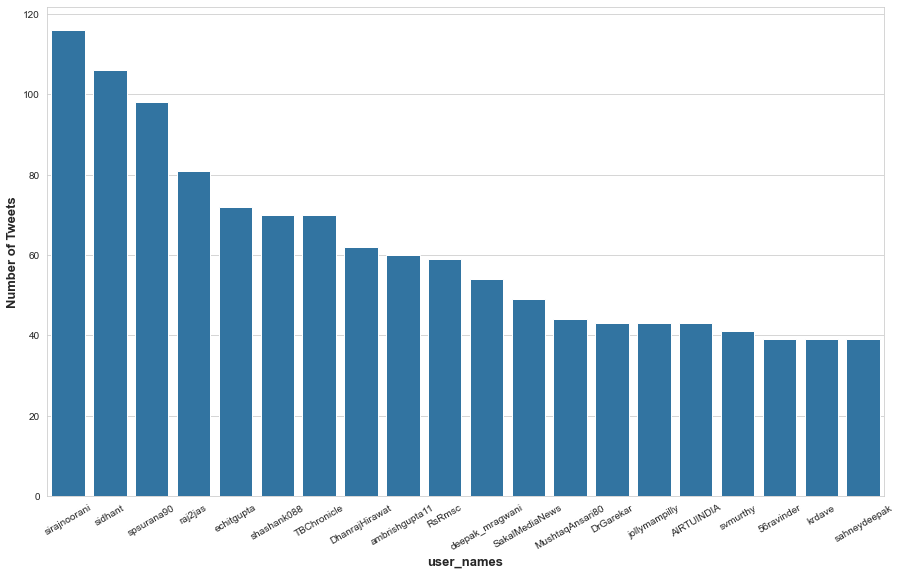

In [11]:
# Plotting plots

plt.figure(figsize = (15, 9))
sb.barplot(x = df.user_screen_name.value_counts()[:20].index, y = df.user_screen_name.value_counts()[:20].values
          , color = base_color);

plt.xticks(rotation = 30);
plt.xlabel('user_names', fontsize = 13, fontweight = 'bold');
plt.ylabel('Number of Tweets', fontsize = 13, fontweight = 'bold');

*Most active twitter users are **sirajnoorani, sidhant, spsurana90**.*

### *Places with most tweets.*

In [12]:
df.place.value_counts()[:20]

new delhi          4153
mumbai             3512
bengaluru south    1167
kolkata             802
noida               709
gurgaon             676
ghaziabad           659
bengaluru           628
lucknow             563
haveli              519
ahmadabad city      507
hyderabad           426
india               419
rajendra nagar      388
uttar pradesh       350
rajasthan           346
pune                323
bhubaneshwar        314
greater noida       286
chandigarh          275
Name: place, dtype: int64

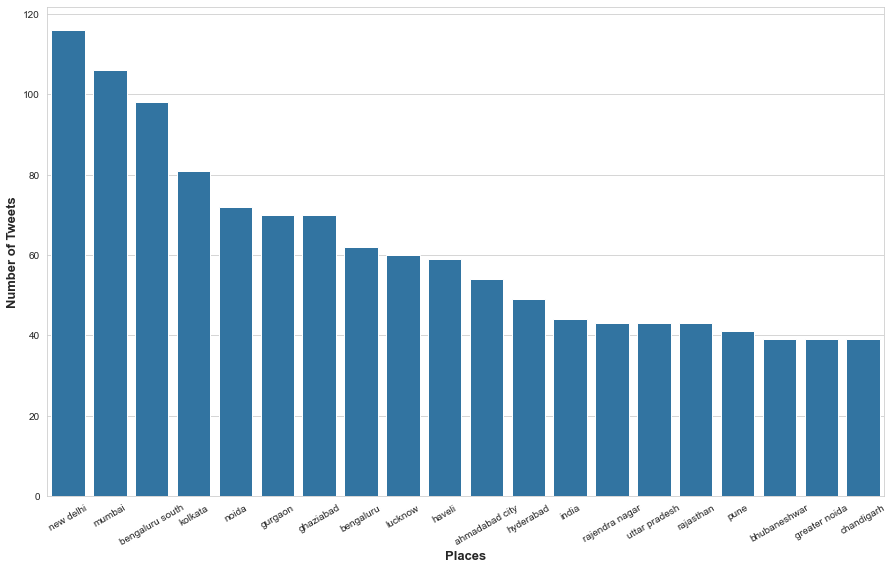

In [13]:
plt.figure(figsize = (15, 9))
sb.barplot(x = df.place.value_counts()[:20].index, y = df.user_screen_name.value_counts()[:20].values
          , color = base_color);

plt.xticks(rotation = 30);
plt.xlabel('Places', fontsize = 13, fontweight = 'bold');
plt.ylabel('Number of Tweets', fontsize = 13, fontweight = 'bold');

*People living in **New Delhi, Mumbai and banglore** tweet the most because these people live in the metro cities and are most active on the internet.*

In [14]:
# Grouping by user_screen_name
grouped_by_username = df.groupby(['user_screen_name'])
grouped_by_username = grouped_by_username.sum().reset_index()

### *Users with most retweets on their tweet*

In [15]:
grouped_by_username.sort_values(by = 'retweet_count', ascending = False)[['user_screen_name', 'retweet_count']][:10]

,user_screen_name,retweet_count
2979,ImRaina,22549
427,AdityaRajKaul,4073
11313,ishafoundation,3820
9804,deepak_mragwani,2102
13836,rajansi45,1787
15227,sidhant,1498
16386,vikrantgupta73,955
13813,rais_shk,849
1086,AshramBlr,676
14584,sanghaviharsh,675


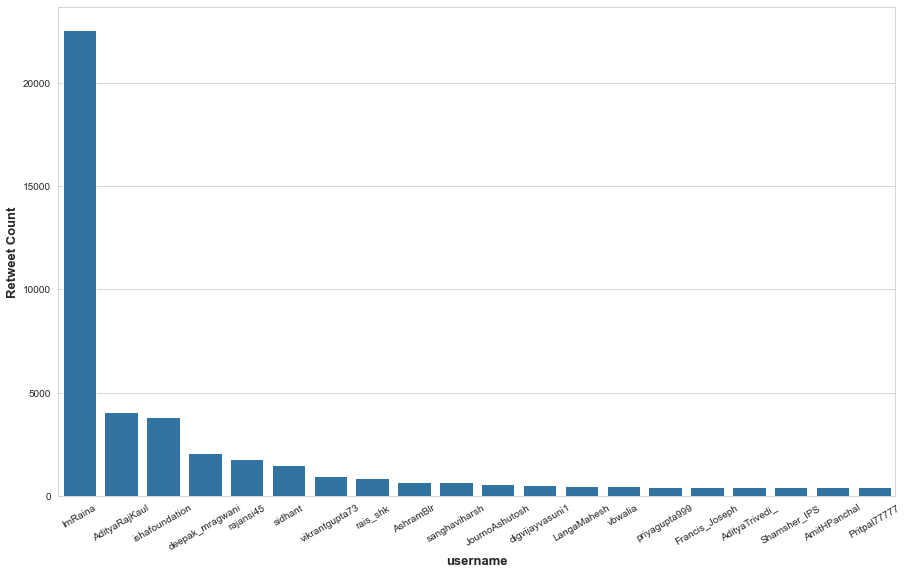

In [16]:
# Barplot of users with most retweets
plt.figure(figsize = (15, 9))
sb.barplot(data = grouped_by_username.sort_values(by = 'retweet_count', ascending = False)[:20], 
           x = 'user_screen_name', y = 'retweet_count', color = base_color)

plt.xticks(rotation = 30);
plt.xlabel('username', fontsize = 13, fontweight = 'bold');
plt.ylabel('Retweet Count', fontsize = 13, fontweight = 'bold');

*Users **ImRaina, SdityaRajKaul, ishaFoundation** has most retweets meaning their tweets are most shared.*

### *Users with High favorite count on all their tweets.*

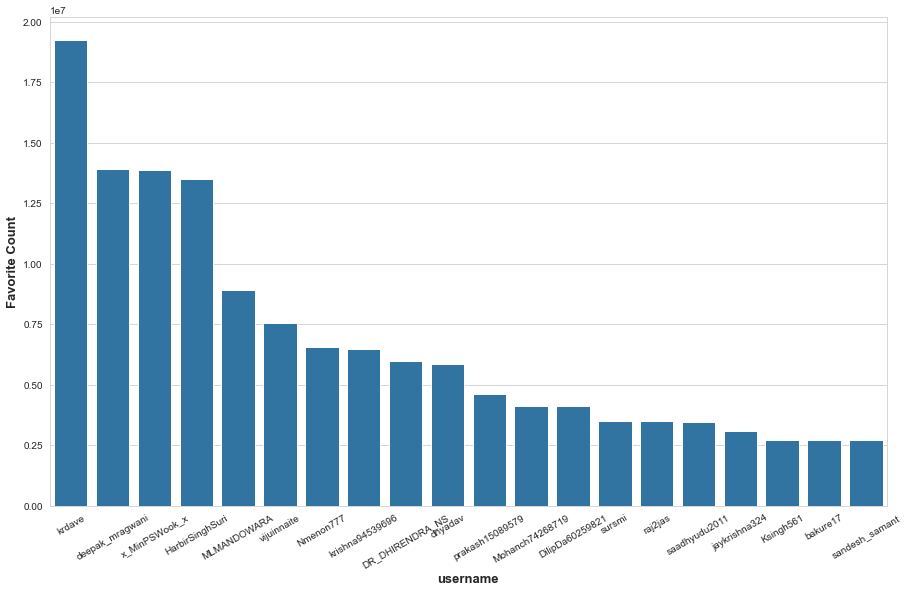

In [17]:
# Barplot of users with most favorites
plt.figure(figsize = (15, 9))
sb.barplot(data = grouped_by_username.sort_values(by = 'user_favourites_count', ascending = False)[:20], 
           x = 'user_screen_name', y = 'user_favourites_count', color = base_color)

plt.xticks(rotation = 30);
plt.xlabel('username', fontsize = 13, fontweight = 'bold');
plt.ylabel('Favorite Count', fontsize = 13, fontweight = 'bold');

*Users **krdave, deepak_mragwani** has most number of favorite on their twitter handles.*

### *Users with high favorite count on their tweet*

In [18]:
grouped_by_username.sort_values(by = 'favorite_count', ascending = False)[['user_screen_name', 'favorite_count']][:10]

,user_screen_name,favorite_count
2979,ImRaina,144012
16386,vikrantgupta73,18568
427,AdityaRajKaul,12867
4366,MsKajalAggarwal,5441
13637,priyagupta999,4959
15227,sidhant,4303
13813,rais_shk,4162
11313,ishafoundation,4037
6615,Shashanka_IAS,3998
15549,sudarsansand,3924


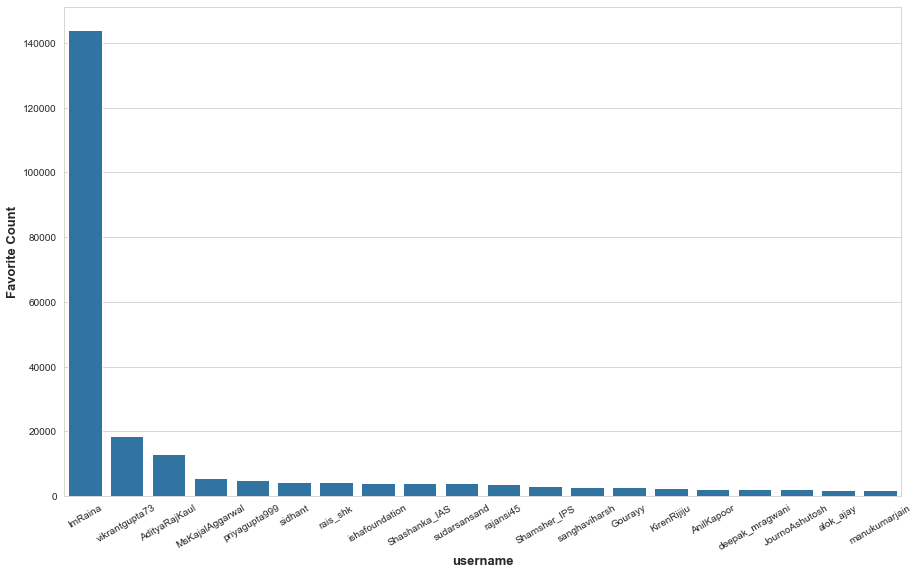

In [19]:
# Barplot of users with most favorites
plt.figure(figsize = (15, 9))
sb.barplot(data = grouped_by_username.sort_values(by = 'favorite_count', ascending = False)[:20], 
           x = 'user_screen_name', y = 'favorite_count', color = base_color)

plt.xticks(rotation = 30);
plt.xlabel('username', fontsize = 13, fontweight = 'bold');
plt.ylabel('Favorite Count', fontsize = 13, fontweight = 'bold');

*Users **Imraina, vikrantgupta73** has most number of favorite on their tweets.*

### *Users with most follower counts.*

In [20]:
grouped_by_username.sort_values(by = 'user_followers_count', ascending = False)[['user_screen_name', 'user_followers_count']][:10]

,user_screen_name,user_followers_count
15944,thekiranbedi,37027548
13637,priyagupta999,19985836
2979,ImRaina,18277206
810,AnilKapoor,12732688
4366,MsKajalAggarwal,9278130
6232,SakalMediaNews,8434085
1852,DalrympleWill,7124388
1471,BiharHealthDept,6717520
3569,KirenRijiju,5511480
2191,DrGarekar,4973279


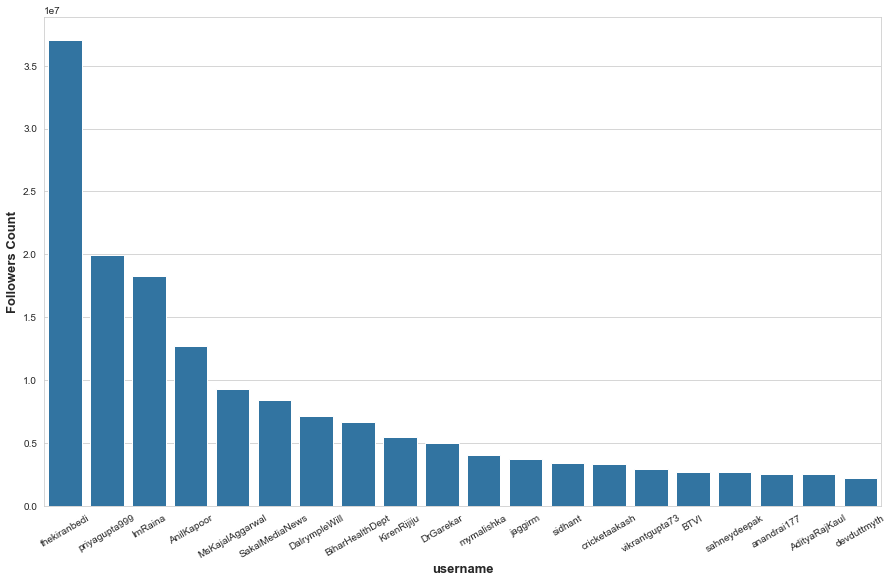

In [21]:
# Barplot of users with most followers
plt.figure(figsize = (15, 9))
sb.barplot(data = grouped_by_username.sort_values(by = 'user_followers_count', ascending = False)[:20], 
           x = 'user_screen_name', y = 'user_followers_count', color = base_color)

plt.xticks(rotation = 30);
plt.xlabel('username', fontsize = 13, fontweight = 'bold');
plt.ylabel('Followers Count', fontsize = 13, fontweight = 'bold');

*Users with most followers are **thekiranbedi, priyagupta999 and imraina**.*

### *Users with most friends count.*

In [22]:
grouped_by_username.sort_values(by = 'user_friends_count', ascending = False)[['user_screen_name', 'user_friends_count']][:10]

,user_screen_name,user_friends_count
11413,jaggirm,3483664
15770,swamies07,867986
11969,krdave,408330
12410,mazher50,388920
9804,deepak_mragwani,377834
15276,sirajnoorani,310300
4422,MushtaqAnsari80,219868
5473,RaghavBhandari5,177048
13818,raj2jas,175203
4015,ManishMib,170000


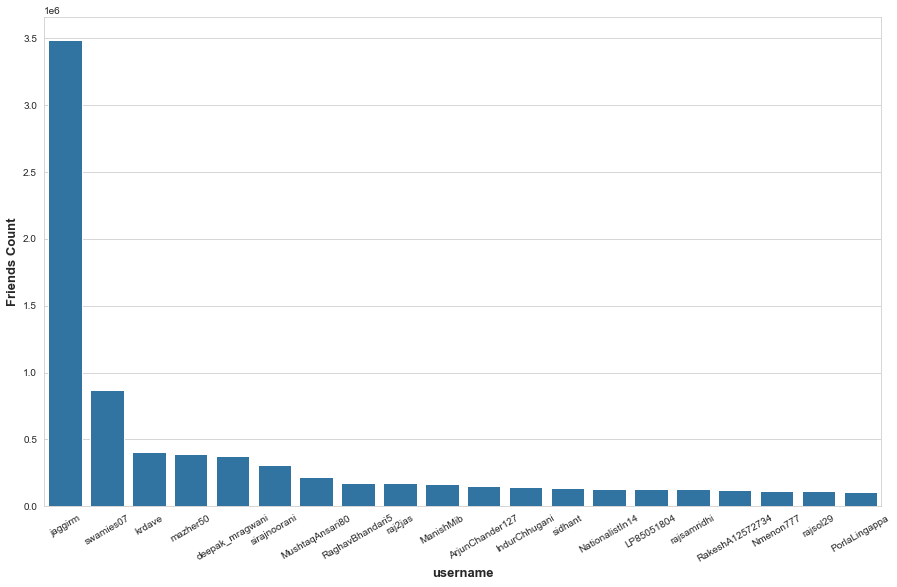

In [23]:
# Barplot of users with most friends
plt.figure(figsize = (15, 9))
sb.barplot(data = grouped_by_username.sort_values(by = 'user_friends_count', ascending = False)[:20], 
           x = 'user_screen_name', y = 'user_friends_count', color = base_color)

plt.xticks(rotation = 30);
plt.xlabel('username', fontsize = 13, fontweight = 'bold');
plt.ylabel('Friends Count', fontsize = 13, fontweight = 'bold');

*Users with most number of friends are **jaggim, swamies07 and krdave**.*

### *Users with most listed counts.* 

In [24]:
grouped_by_username.sort_values(by = 'user_listed_count', ascending = False)[['user_screen_name', 'user_listed_count']][:10]

,user_screen_name,user_listed_count
15227,sidhant,27410
6232,SakalMediaNews,26215
14440,sahneydeepak,23790
15944,thekiranbedi,17325
2191,DrGarekar,13674
1250,BTVI,10472
427,AdityaRajKaul,10098
13637,priyagupta999,8308
1852,DalrympleWill,7296
706,AmitHPanchal,7216


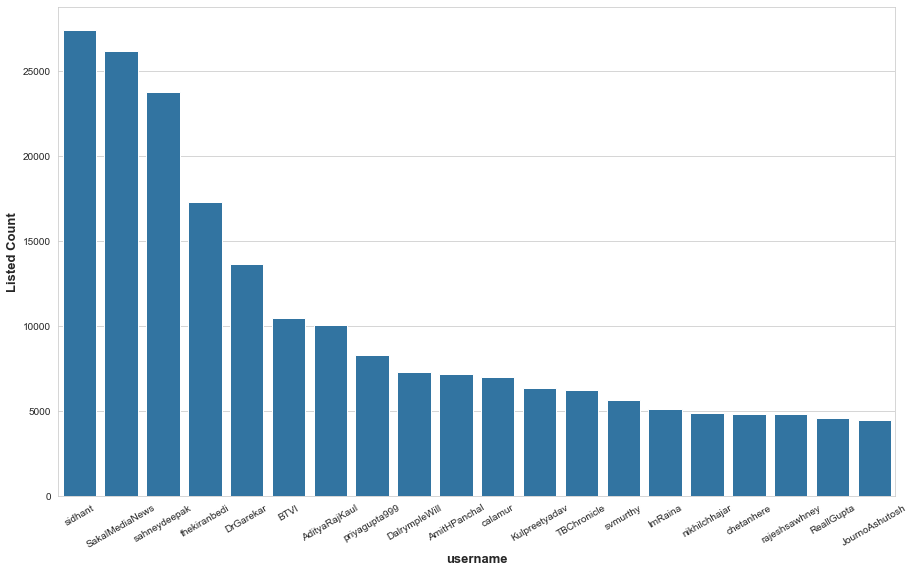

In [25]:
# Barplot of users with most listed count
plt.figure(figsize = (15, 9))
sb.barplot(data = grouped_by_username.sort_values(by = 'user_listed_count', ascending = False)[:20], 
           x = 'user_screen_name', y = 'user_listed_count', color = base_color)

plt.xticks(rotation = 30);
plt.xlabel('username', fontsize = 13, fontweight = 'bold');
plt.ylabel('Listed Count', fontsize = 13, fontweight = 'bold');

*Most mentioned username are **siddhant, sakalMediaNews, sahneydeepak**.*

### *Users with most status count.*

In [26]:
grouped_by_username.sort_values(by = 'user_statuses_count', ascending = False)[['user_screen_name', 'user_statuses_count']][:10]

,user_screen_name,user_statuses_count
4905,PairsonnalitesA,19985510
2713,HarbirSinghSuri,19206096
9804,deepak_mragwani,17023392
8494,ambrishgupta11,15791720
2191,DrGarekar,12587941
3838,MLMANDOWARA,12136594
5812,ReallGupta,7685936
6232,SakalMediaNews,6887196
11969,krdave,6587490
15227,sidhant,5950023


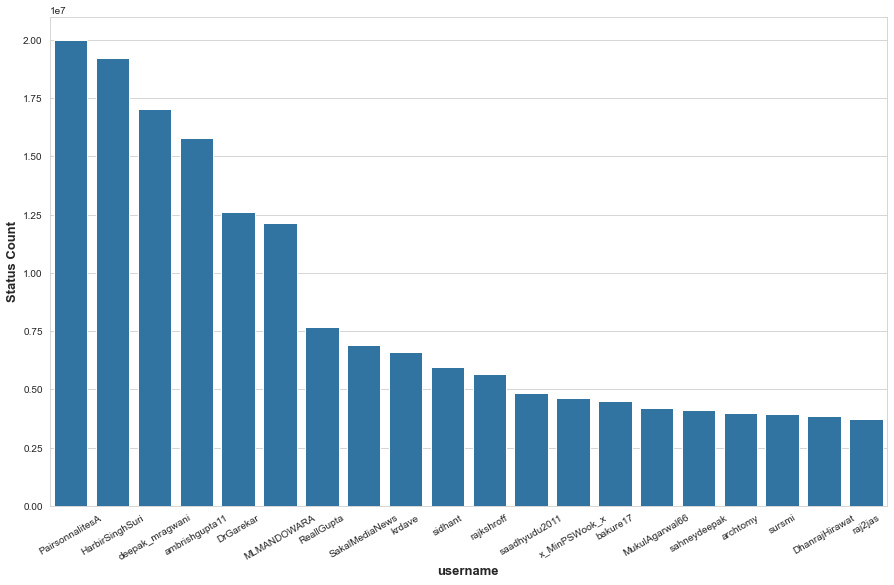

In [27]:
# Barplot of users with most status count
plt.figure(figsize = (15, 9))
sb.barplot(data = grouped_by_username.sort_values(by = 'user_statuses_count', ascending = False)[:20], 
           x = 'user_screen_name', y = 'user_statuses_count', color = base_color)

plt.xticks(rotation = 30);
plt.xlabel('username', fontsize = 13, fontweight = 'bold');
plt.ylabel('Status Count', fontsize = 13, fontweight = 'bold');

*Users with most number of status are **PairsonnalitiesA, HarbirSinghSuri**.*

### *After seeing above results, we see that their must be good correlation between favorite, retweets, status and mentions.*

### *Checking Correlation between attributes.*

In [28]:
grouped_by_username.shape

(16734, 8)

In [29]:
grouped_by_username.corr()

,favorite_count,retweet_count,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_statuses_count
favorite_count,1.000000,0.975702,0.010503,0.398529,0.005523,0.139202,0.014995
retweet_count,0.975702,1.000000,0.042836,0.379572,0.018070,0.167028,0.053070
user_favourites_count,0.010503,0.042836,1.000000,0.034869,0.171881,0.109772,0.599488
user_followers_count,0.398529,0.379572,0.034869,1.000000,0.085172,0.525920,0.101237
user_friends_count,0.005523,0.018070,0.171881,0.085172,1.000000,0.069943,0.155075
user_listed_count,0.139202,0.167028,0.109772,0.525920,0.069943,1.000000,0.396586
user_statuses_count,0.014995,0.053070,0.599488,0.101237,0.155075,0.396586,1.000000


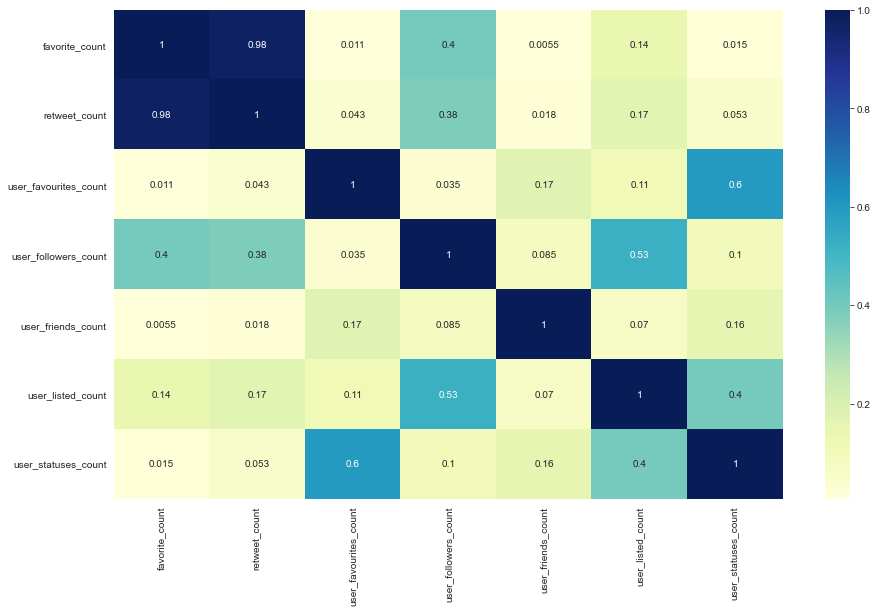

In [30]:
plt.figure(figsize = (15, 9))
sb.heatmap(grouped_by_username.corr(), cmap = "YlGnBu", annot = True);

- ***Indeed, their is high correlation between favorites and retweets as more the retweets mean more spreaded the tweet resulting in more favorite count.***
- ***Their are good correlations present too, between user_favorites_Count and user_status_counts and user_listed_count and user_follower_count.***
- ***This is how twitter works, more popular or mentioned the user is, more the follower and friends the person has.***

## *Popularity of Hashtags*

In [34]:
hashtags.sample(5)

,hashtag,count
10517,#proudsbi,2
7081,#bhushangamre,2
11219,#ph,2
2740,#indialockdown21,2
9964,#globalcitizen,3


### *Top 10 Hashtags*

In [38]:
# sorting hashtags
hashtags = hashtags.sort_values(by = 'count', ascending = False)
hashtags.head(20)

,hashtag,count
1,#corona,8665
69,#covid19,5937
28,#coronavirus,3490
6,#indiafightscorona,2367
13,#lockdown,2305
263,#covid,2205
18,#stayhome,1551
68,#covid_19,1504
5,#india,1144
193,#stayhomestaysafe,1077


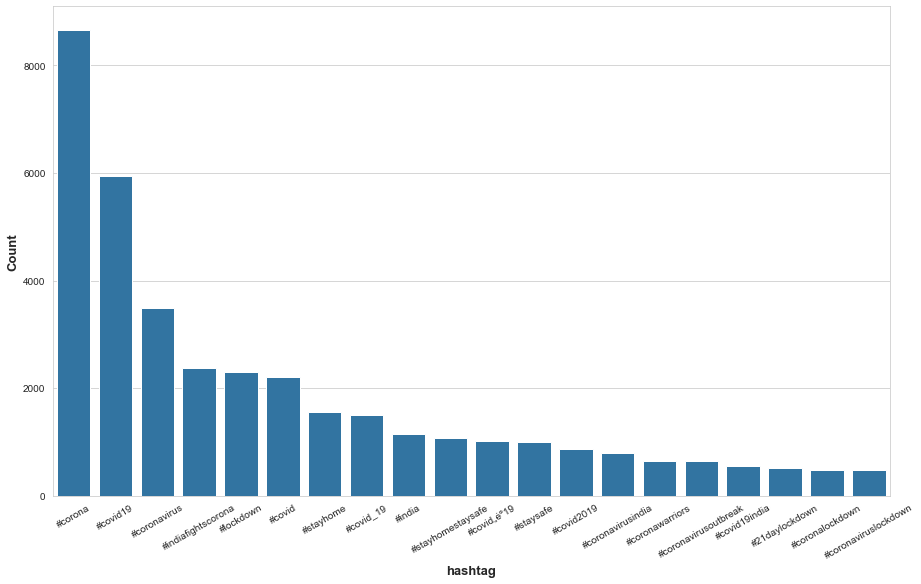

In [41]:
# Plotting top hashtags
plt.figure(figsize = (15, 9))

sb.barplot(data = hashtags[:20], x = 'hashtag', y = 'count', color = base_color)
plt.xticks(rotation = 30);
plt.xlabel('hashtag', fontsize = 13, fontweight = 'bold');
plt.ylabel('Count', fontsize = 13, fontweight = 'bold');

*These tweets are taken from the month during **coronavirus (Covid-19) lockdown,** so most of the hashtags are related to it making it most used hashtag.*

## *Creating a Word Cloud.*

In [42]:
from wordcloud import WordCloud, STOPWORDS

### Word Cloud of Tweets

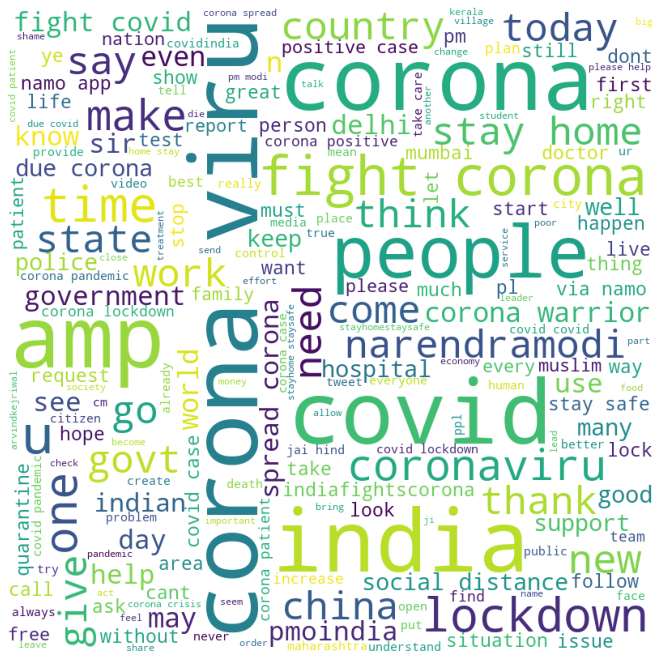

In [45]:
stopwords = set(STOPWORDS) 

wordcloud = WordCloud(width = 800, height = 800, 
                background_color = 'white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(" ".join(tweets)) 
  
# plotting the WordCloud image                        
plt.figure(figsize = (15, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show();

### Word Cloud of Hashtags

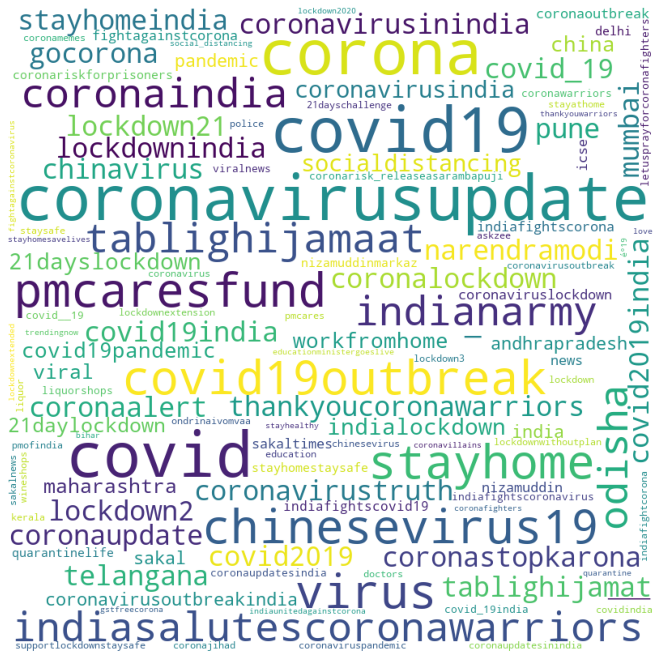

In [62]:
stopwords = set(STOPWORDS) 
temp_hashtags = [key for key, value in list(zip(hashtags.hashtag, hashtags['count'])) if value > 100]
wordcloud = WordCloud(width = 800, height = 800, 
                background_color = 'white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(" ".join(set(temp_hashtags))) 
  
# plotting the WordCloud image                        
plt.figure(figsize = (15, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show();

*These tweets are taken during **covid-19 lockdown** so, most used words in tweets must be related to this.*

## Sentiment Analysis

#### *Let's check people's sentiment in their tweets, most of them might be positive as Covid-19 was going on and people might motivate each other.*

**We are going to check sentiments from all the tweets regardless related to covid or not as this is not going to make much difference, because most of the tweets are related to Covid-19 and most of the tweet must be motivational.**

In [72]:
# Importing Libraries
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

### Using TextBlob

#### Creating dataframe of tweets for textblob

In [112]:
# Tweet analysis creating tweet dataframe
df_tweets_textblob = pd.DataFrame(tweets, columns = ['tweets'])

df_tweets_textblob.head(10)

,tweets
0,meditation mindfulness tip cop corona virus pa...
1,contribute india fight corona gandhinagar gujarat
2,@delhipolice sir please send team immediately ...
3,sscufmmatkarona corona slow poison ufm instant...
4,mata di doston ise corona ke tarah faila bhai ...
5,@chintskap mum phd corona virus whatsapp unive...
6,@funnyhammy dumbo amount count today emergency...
7,first allow corona possessions stop kirana sho...
8,@tvmarathi kindly help us break chain corona
9,safe home corona busy infect people spread lik...


#### Creating sentiment column which contains two scores : Polarity and Subjectivity.

In [114]:
df_tweets_textblob['sentiment'] = df_tweets_textblob['tweets'].apply(lambda x: TextBlob(x).sentiment)

In [115]:
df_tweets_textblob.head(10)

,tweets,sentiment
0,meditation mindfulness tip cop corona virus pa...,"(-0.25, 1.0)"
1,contribute india fight corona gandhinagar gujarat,"(0.0, 0.0)"
2,@delhipolice sir please send team immediately ...,"(0.0, 0.0)"
3,sscufmmatkarona corona slow poison ufm instant...,"(0.033333333333333326, 0.5222222222222223)"
4,mata di doston ise corona ke tarah faila bhai ...,"(0.0, 0.0)"
5,@chintskap mum phd corona virus whatsapp unive...,"(0.0, 0.0)"
6,@funnyhammy dumbo amount count today emergency...,"(0.0, 0.0)"
7,first allow corona possessions stop kirana sho...,"(0.1880952380952381, 0.42936507936507934)"
8,@tvmarathi kindly help us break chain corona,"(0.6, 0.9)"
9,safe home corona busy infect people spread lik...,"(0.3333333333333333, 0.5166666666666667)"


***Seperating polarity and subject***

In [116]:
df_tweets_textblob['polarity'] = df_tweets_textblob['sentiment'].apply(lambda x: x[0])
df_tweets_textblob['subjectivity'] = df_tweets_textblob['sentiment'].apply(lambda x: x[1])

In [117]:
def sentiment_type(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

#### Creating column to determine sentiment type.

In [118]:
df_tweets_textblob['sentiment_type'] = df_tweets_textblob.polarity.apply(sentiment_type)

In [119]:
# Value counts
df_tweets_textblob['sentiment_type'].value_counts()

Positive    19643
Neutral     16104
Negative     8411
Name: sentiment_type, dtype: int64

In [120]:
df_tweets_textblob.describe()

,polarity,subjectivity
count,44158.000000,44158.000000
mean,0.092059,0.352333
std,0.276395,0.304574
min,-1.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.375000
75%,0.208333,0.568182
max,1.000000,1.000000


#### Checking Polarity Distribution, i.e. where most of the tweets related to.

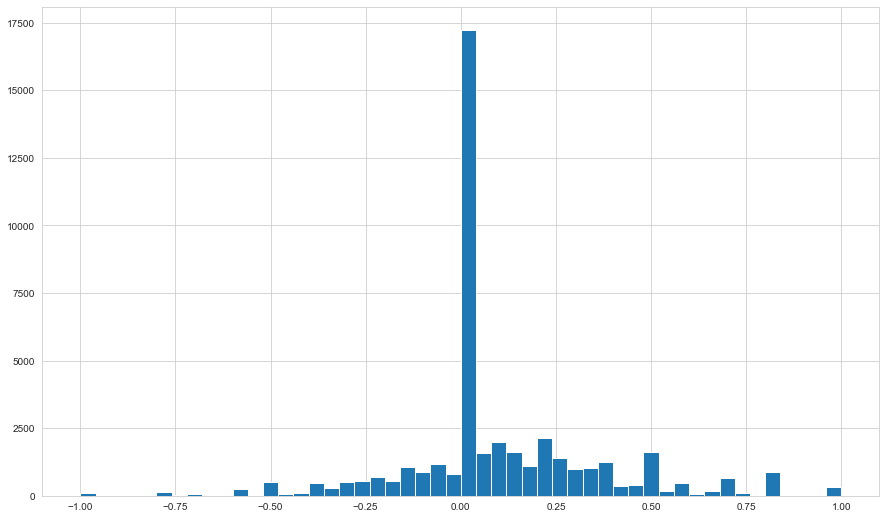

In [121]:
# Polarity Distribution
plt.figure(figsize = (15, 9))
plt.hist(df_tweets_textblob.polarity, bins = 50);

#### Number of tweets as per category of Positive, Negative and Neutral.

In [122]:
df_tweets_textblob['sentiment_type'].value_counts().reset_index()

,index,sentiment_type
0,Positive,19643
1,Neutral,16104
2,Negative,8411


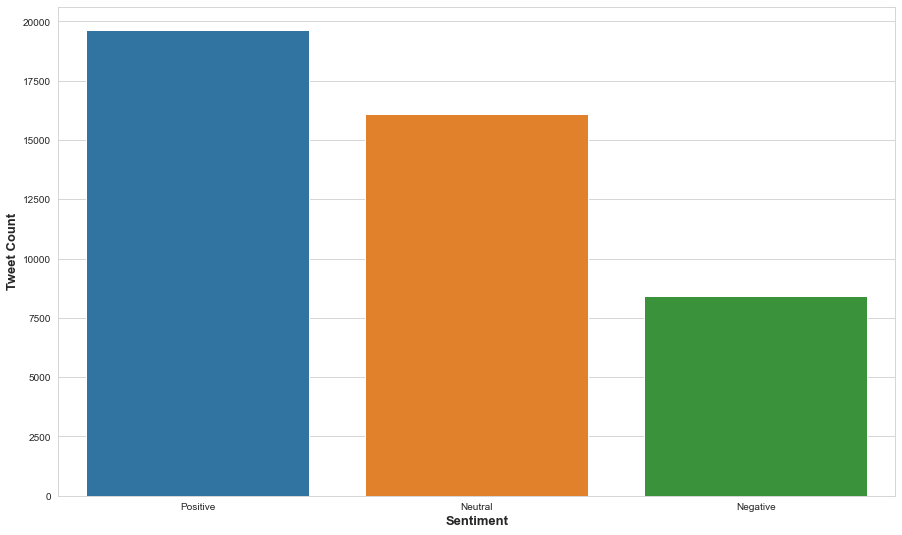

In [124]:
plt.figure(figsize = (15, 9))
sb.barplot(data = df_tweets_textblob['sentiment_type'].value_counts().reset_index(), x = 'index', y = 'sentiment_type')

#plt.xticks(rotation = 30);
plt.xlabel('Sentiment', fontsize = 13, fontweight = 'bold');
plt.ylabel('Tweet Count', fontsize = 13, fontweight = 'bold');

## Vader Sentiment

#### Using Vader Sentiment as it is also a popular method for sentiment analysis.

In [125]:
analyzer = SentimentIntensityAnalyzer()

In [127]:
# Tweet analysis creating tweet dataframe
df_tweets_vader = pd.DataFrame(tweets, columns = ['tweets'])

df_tweets_vader.head(10)

,tweets
0,meditation mindfulness tip cop corona virus pa...
1,contribute india fight corona gandhinagar gujarat
2,@delhipolice sir please send team immediately ...
3,sscufmmatkarona corona slow poison ufm instant...
4,mata di doston ise corona ke tarah faila bhai ...
5,@chintskap mum phd corona virus whatsapp unive...
6,@funnyhammy dumbo amount count today emergency...
7,first allow corona possessions stop kirana sho...
8,@tvmarathi kindly help us break chain corona
9,safe home corona busy infect people spread lik...


#### Vader creates sentiment scores for 4 types about how much bent the tweet is toward that category : Positive, Negative, Neutral and final is polarity value which determines sentiment.

In [128]:
df_tweets_vader['sentiment'] = df_tweets_vader['tweets'].apply(lambda x: analyzer.polarity_scores(x))

In [131]:
df_tweets_vader['positive'] = df_tweets_vader['sentiment'].apply(lambda x: x['pos'])
df_tweets_vader['negative'] = df_tweets_vader['sentiment'].apply(lambda x: x['neg'])
df_tweets_vader['neutral'] = df_tweets_vader['sentiment'].apply(lambda x: x['neu'])
df_tweets_vader['polarity_value'] = df_tweets_vader['sentiment'].apply(lambda x: x['compound'])

In [132]:
df_tweets_vader.head(10)

,tweets,sentiment,positive,negative,neutral,polarity_value
0,meditation mindfulness tip cop corona virus pa...,"{'neg': 0.103, 'neu': 0.769, 'pos': 0.128, 'co...",0.128,0.103,0.769,0.1280
1,contribute india fight corona gandhinagar gujarat,"{'neg': 0.342, 'neu': 0.658, 'pos': 0.0, 'comp...",0.000,0.342,0.658,-0.3818
2,@delhipolice sir please send team immediately ...,"{'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'comp...",0.247,0.000,0.753,0.3182
3,sscufmmatkarona corona slow poison ufm instant...,"{'neg': 0.464, 'neu': 0.536, 'pos': 0.0, 'comp...",0.000,0.464,0.536,-0.8316
4,mata di doston ise corona ke tarah faila bhai ...,"{'neg': 0.0, 'neu': 0.607, 'pos': 0.393, 'comp...",0.393,0.000,0.607,0.8271
5,@chintskap mum phd corona virus whatsapp unive...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
6,@funnyhammy dumbo amount count today emergency...,"{'neg': 0.338, 'neu': 0.556, 'pos': 0.107, 'co...",0.107,0.338,0.556,-0.6597
7,first allow corona possessions stop kirana sho...,"{'neg': 0.109, 'neu': 0.545, 'pos': 0.347, 'co...",0.347,0.109,0.545,0.5859
8,@tvmarathi kindly help us break chain corona,"{'neg': 0.0, 'neu': 0.459, 'pos': 0.541, 'comp...",0.541,0.000,0.459,0.7096
9,safe home corona busy infect people spread lik...,"{'neg': 0.065, 'neu': 0.596, 'pos': 0.339, 'co...",0.339,0.065,0.596,0.8442


In [135]:
def sentiment_type(polarity):
    if polarity > 0.05:
        return 'Positive'
    elif polarity < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [136]:
df_tweets_vader['sentiment_type'] = df_tweets_vader.polarity_value.apply(sentiment_type)

#### Vader is giving more accurate analysis, as covid tweets should be more negative than neutral.

In [138]:
# Value counts
df_tweets_vader['sentiment_type'].value_counts()

Positive    22901
Negative    12397
Neutral      8860
Name: sentiment_type, dtype: int64

In [139]:
df_tweets_vader.describe()

,positive,negative,neutral,polarity_value
count,44158.000000,44158.000000,44158.000000,44158.000000
mean,0.185582,0.106470,0.707948,0.141316
std,0.188648,0.146078,0.207350,0.486672
min,0.000000,0.000000,0.000000,-0.984200
25%,0.000000,0.000000,0.577000,-0.153100
50%,0.157000,0.000000,0.710000,0.077200
75%,0.292000,0.180000,0.857000,0.557400
max,1.000000,1.000000,1.000000,0.989900


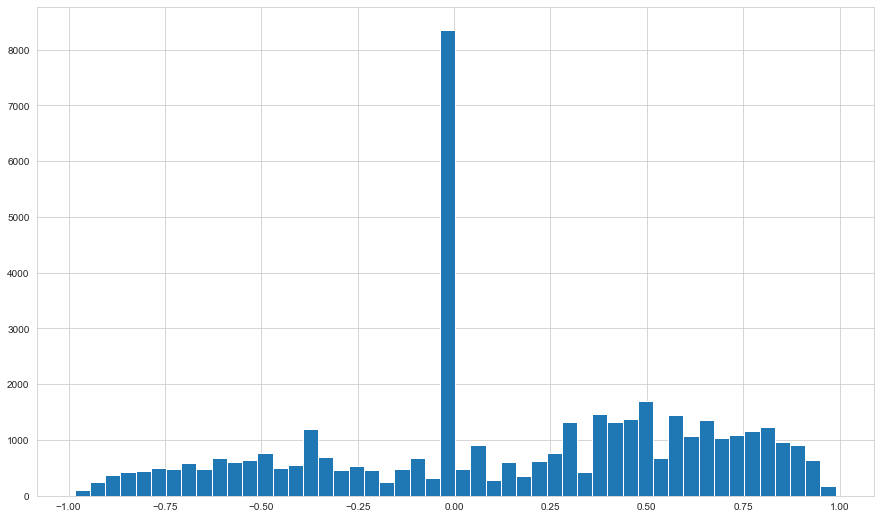

In [140]:
# Polarity Distribution
plt.figure(figsize = (15, 9))
plt.hist(df_tweets_vader.polarity_value, bins = 50);

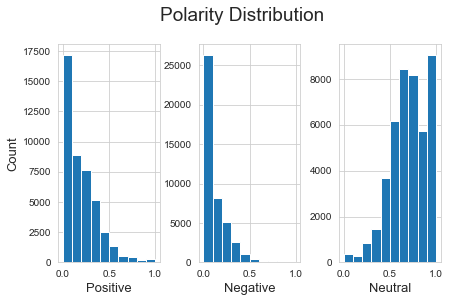

<Figure size 1080x648 with 0 Axes>

In [158]:

fig, ax = plt.subplots(ncols = 3)
fig.suptitle("Polarity Distribution", fontsize = 19)

fig.tight_layout()
ax[0].set_xlabel("Positive", fontsize = 13)
ax[1].set_xlabel("Negative", fontsize = 13)
ax[2].set_xlabel("Neutral", fontsize = 13)
ax[0].set_ylabel("Count", fontsize = 13)

ax[0].hist(df_tweets_vader['positive']);
ax[1].hist(df_tweets_vader['negative']);
ax[2].hist(df_tweets_vader['neutral']);

In [141]:
df_tweets_vader['sentiment_type'].value_counts().reset_index()

,index,sentiment_type
0,Positive,22901
1,Negative,12397
2,Neutral,8860


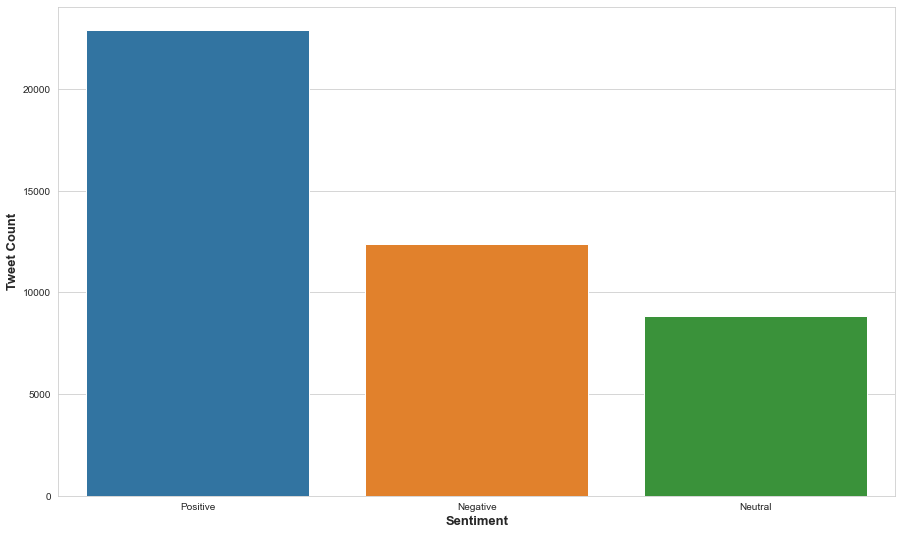

In [142]:
plt.figure(figsize = (15, 9))
sb.barplot(data = df_tweets_vader['sentiment_type'].value_counts().reset_index(), x = 'index', y = 'sentiment_type')

#plt.xticks(rotation = 30);
plt.xlabel('Sentiment', fontsize = 13, fontweight = 'bold');
plt.ylabel('Tweet Count', fontsize = 13, fontweight = 'bold');

## Conclusion
- The dataset contains data from twitter for 2 Months with initial period of Covid-19 in India.
- The dataset contains tweet from India only.
- Since, it is Covid-19 period, sentiments of the people are supposed to be more positive and negative than neutral. As people might be more motivational and angry towards the disease.

**Steps Followed :**

- Data is collected from the internet zip file and then extracted into machine. This will maintain the changes if more data is added.

- Data is then, cleaned by
    - By extracting tweets as a seperate file, as linking tweets to user might lead to privacy issues.
    - Extracting used hashtags in the tweets and maintaining the count.
    - By cleaning the extracted data and removing attributes no longer neccessary.

- Data is then saved into machine.
- Data Analysis is done, by considering basic twitter attributes
    - Most follower counts
    - Most friend counts
    - Most retweets
    - Most liked tweet
    - Most status count
    - Most listed or mentioned user

#### WordClouds
- Most Used Hashtag
- Most Used Word by WordCloud

#### Sentiment Analysis
- Sentiment Analysis is done using two most popular techniques:
    - Textblob
    - Vader Sentiment Analysis